In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(56)

k = 3

# x, y, r
balls = set[tuple[int, int, int]]([(1000, 3000, 2000), (5000, 5000, 3000), (8000, 3000, 4000), (8000, 8000, 2000), (8000, 1000, 1000)])
len_balls = len(balls)

# points
num_points = 100
minlim = 0
maxlim = 10_000
coords_x = np.random.randint(minlim, maxlim, num_points)
coords_y = np.random.randint(minlim, maxlim, num_points)
points = list(zip(coords_x, coords_y))
n = len(points)

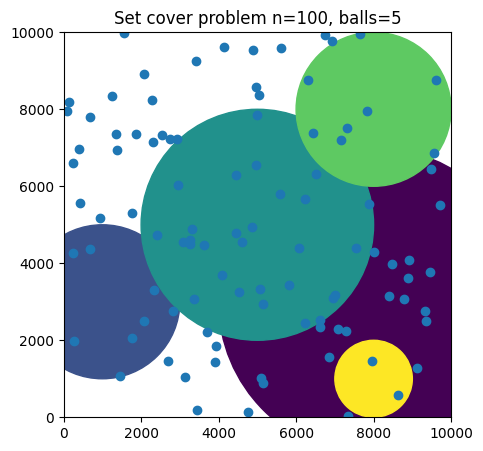

In [2]:
def gca(ax):
    if ax is None:
        plt.figure(figsize=(5, 5))
        ax = plt.gca()
    return ax

def plot(balls, title, ax=None):
    ax = gca(ax)
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(balls)))
    # fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(title)
    plt.xlim(minlim, maxlim)
    plt.ylim(minlim, maxlim)

    for i, (x, y, r) in enumerate(balls):
        circle = plt.Circle((x, y), r, color=colors[i])
        ax.add_patch(circle)
    ax.scatter(coords_x, coords_y)
    # ax.set_xlim(minlim, maxlim)
    # ax.set_ylim(minlim, maxlim)

plot(balls, f'Set cover problem n={n}, balls={len_balls}')

In [3]:
import math

def in_circle(center_x, center_y, radius, x, y):
    dist = math.sqrt((center_x - x) ** 2 + (center_y - y) ** 2)
    return dist <= radius

for i, (x_center, y_center, r) in enumerate(balls):
    for (x, y) in points:
        if in_circle(x_center, y_center, r, x, y):
            # print(f'{(x, y)} in ball {i}: {(x_center, y_center, r)}')
            print(f'{(int(x), int(y))} in ball {i}: {(int(x_center), int(y_center), int(r))}')

(9451, 3778) in ball 0: (8000, 3000, 4000)
(9338, 2757) in ball 0: (8000, 3000, 4000)
(4452, 4787) in ball 0: (8000, 3000, 4000)
(6224, 2454) in ball 0: (8000, 3000, 4000)
(4853, 4930) in ball 0: (8000, 3000, 4000)
(5058, 3320) in ball 0: (8000, 3000, 4000)
(8778, 3075) in ball 0: (8000, 3000, 4000)
(8464, 3992) in ball 0: (8000, 3000, 4000)
(5106, 1012) in ball 0: (8000, 3000, 4000)
(7084, 2298) in ball 0: (8000, 3000, 4000)
(4095, 3690) in ball 0: (8000, 3000, 4000)
(9718, 5522) in ball 0: (8000, 3000, 4000)
(7886, 5552) in ball 0: (8000, 3000, 4000)
(5583, 5800) in ball 0: (8000, 3000, 4000)
(6624, 2335) in ball 0: (8000, 3000, 4000)
(8011, 4295) in ball 0: (8000, 3000, 4000)
(7005, 3167) in ball 0: (8000, 3000, 4000)
(6515, 6310) in ball 0: (8000, 3000, 4000)
(6838, 1555) in ball 0: (8000, 3000, 4000)
(8402, 3141) in ball 0: (8000, 3000, 4000)
(6943, 3087) in ball 0: (8000, 3000, 4000)
(8883, 3620) in ball 0: (8000, 3000, 4000)
(5816, 3433) in ball 0: (8000, 3000, 4000)
(6072, 4387

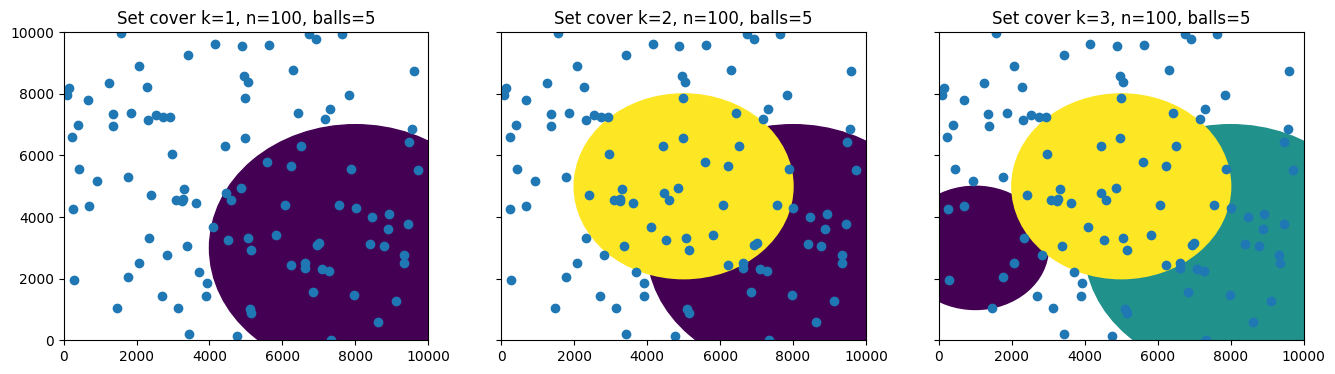

In [4]:
O_balls = set[tuple[int, int, int]]()
O_points = set[tuple[int, int]]()

# O subset of V
def find_initial_max_covering_ball(O_balls, balls, O_points, points):
    max_ball = None
    selected_points = set[tuple[int, int]]()

    for current_ball in balls:
        (x_center, y_center, r) = current_ball
        current_point_coverage = set[tuple[int, int]]()

        for (x, y) in points:
            if in_circle(x_center, y_center, r, x, y) and (x, y) not in O_points:
                current_point_coverage.add((x, y))
        
        if len(current_point_coverage) >= len(selected_points):
            max_ball = current_ball
            selected_points = current_point_coverage
    
    return max_ball, selected_points
fig = plt.figure(figsize=(16, 4))
axs = fig.subplots(1, k, sharex=True, sharey=True)
for i in range(k):
    max_ball, selected_points = find_initial_max_covering_ball(O_balls, balls, O_points, points)
    
    # remove from V
    balls.remove(max_ball)
    for point in selected_points:
        points.remove(point)

    # add to S
    O_balls.add(max_ball)
    O_points = O_points.union(selected_points)

    plot(O_balls, f'Set cover k={i + 1}, n={n}, balls={len_balls}', axs[i])


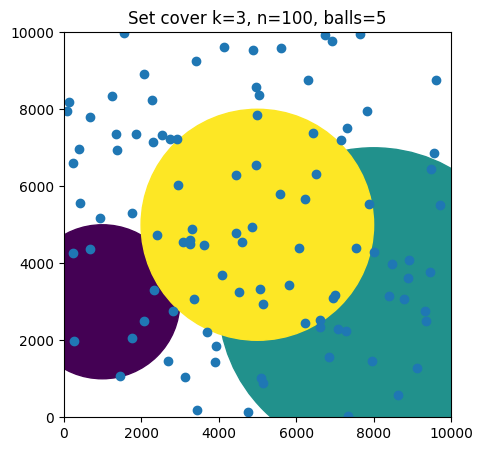

In [5]:
plot(O_balls, f'Set cover k={k}, n={n}, balls={len_balls}')